# Classify architecture type from an image of a home

Idea with this project is to classify architecture type from an image of a home

- maybe look at geographic trends in home type?
- not sure exactly.

Here are the types we're are using for classification:
1. prairie-style (prairie)
2. Queen Anne victorian (victorian)
3. Chicago bungalow (bungalow)
4. American foursquare (foursquare)


In [ ]:
## IMPORTANT!!!
# for this to work you need to run `PYTORCH_ENABLE_MPS_FALLBACK=1 jupyter notebook` before loading this notebook
# there is an error that pops up later with augmentation that I couldn't figure out how to change while in the
# notebook.

# setup and loading

# to avoid warning of PyTorch
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="torch.nn.functional")

# fastai V1 library which sits on top of Pytorch 1.0
from fastai.vision import *

import requests

from bs4 import BeautifulSoup

from fastai.vision.all import *
from fastai.vision import *

## Get redfin listings

In [1]:
# other data?
# look at how (selling?) price of homes is affected by the way it's described
# would be cool if I can do image analysis on homes to classify actual architectural style

main_url = "https://www.redfin.com/IL/Oak-Park/613-S-Grove-Ave-60304/home/13249167"

# Getting individual cities url
# re = requests.get(main_url)
# soup = BeautifulSoup(re.text, "html.parser")
# soup

# NB this failed because they think it's a bot

In [ ]:
# let's try something else
headers = {"User-Agent": "Mozilla/5.0 (X11; Linux x86_64; rv:78.0)   Gecko/20100101 Firefox/78.0", 
"Referer": "https://www.google.com"}

main_url = "https://www.redfin.com/zipcode/60304"

response = requests.get(main_url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")
# this works!
soup


In [1]:
# 

import requests

from bs4 import BeautifulSoup

headers = {"User-Agent": "Mozilla/5.0 (X11; Linux x86_64; rv:78.0)   Gecko/20100101 Firefox/78.0", 
"Referer": "https://www.google.com"}

url = "https://www.redfin.com/zipcode/60304/filter/property-type=house,include=sold-5yr"
# this should get us 981 homes

resp = requests.get(url, headers=headers, verify=False)

soup=BeautifulSoup(resp.text,'html.parser')
allBoxes = soup.find_all("div",{"class":"HomeCardContainer"})

/Users/chad/miniconda3/lib/python3.10/site-packages/urllib3/connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.redfin.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


In [5]:
len(allBoxes)
# ok it's not getting everything in all the pages.


43

In [ ]:
# re.findall('.*?jpg', str(soup))

# find images
img = soup.findAll('img')
img

In [18]:
# now I need to find out how to extract data...
# soup.contents

# ok- thinking about this
# according to xx there are 25000 homes in Oak Park
# on redfin, there are ~3000 in last 5 years

import pandas as pd

# get a list of addresses in Cook county - found on the cookcountyil.gov website
# TODO: extend to other cities?
cook = pd.read_csv("../data/raw/Assessor_-_Parcel_Addresses_20240910.csv")

{'1021 S WESLEY AV',
 '834 S CUYLER AVE',
 '716 S SCOVILLE AVE',
 '6226 ROOSEVELT RD',
 '1142 S GROVE AVE',
 '1139 S OAK PARK AVE#C',
 '1013 S CUYLER AV',
 '1151 HOME AVE',
 '916 S TAYLOR',
 '833 S WENONAH AV',
 '531 S. CUYLER',
 '601 KNOLLWOOD DRIVE',
 '540 W HARRISON',
 '540 S EAST AVE',
 '639 S RIDGELAND AVE',
 '923 S CLARENCE AVE #2',
 '1181 S GROVE AVE',
 '612 S KENILWORTH AVE',
 '621 S MAPLE #306',
 '1017 S LOMBARD AVENUE',
 '73 WARRINGTON CT',
 '1134 WISCONSIN AV',
 '520 GUNDERSON',
 '1000 S CUYLER',
 '717 S SCOVILLE AVE',
 '1159 S WISCONSIN',
 '608 S SCOVILLE',
 '744 S TAYLOR',
 '1112 LYMAN AVE',
 '130 S AUSTIN',
 '1185 S RIDGELAND AV',
 '946 CLINTON AVE',
 '840  S HARVEY',
 '527 S ELMWOOD',
 '829 S KENILWORTH AVE',
 '1137 S WESLEY AV',
 '737 S HARVEY',
 '803 WENONAH AVE',
 '843 WENONAH AVE',
 '619 PLAINFIELD RD',
 '721 S EAST AVE',
 '714 GUNDERSON AVE',
 '830 S GROVE',
 '1019 WENONAH AVE',
 '540 S HARVEY',
 '711 CLARENCE AVE',
 '1192 CLARENCE AVE #18',
 '531 S CUYLER AVE#2',
 

In [35]:
# print(cook.head())

unique_addresses = set(cook['mailing_address'])

unique_addresses = [str(x) for x in unique_addresses]

len(unique_addresses)


5305

In [54]:
# functino to scrape
def scrape_redfin(address: str):
    # search based on text
    url = "redfin.com/IL/Oak-Park/" + address + 60304 + "/home/"
    resp = requests.get(url, headers=headers, verify=False)
    soup = BeautifulSoup(resp.text,'html.parser')
    #allBoxes = soup.find_all("div",{"class":"HomeCardContainer"})

    # try return
    return soup
    # get metadata

    # keep only if single-family home

# scrape_redfin(address = unique_addresses[0])

address = unique_addresses[1]


address = ' '.join(word.capitalize() for word in address.split())
address = address.replace(' ', '-')
address = address.replace('Av\b', 'Ave\b')

address

url = "www.redfin.com/IL/Oak-Park/" + address + "-60304/home/"
# resp = requests.get(url, headers=headers, verify=False)

url


'www.redfin.com/IL/Oak-Park/834-S-Cuyler-Ave-60304/home/'

In [63]:
def search_houses(query):
    """
    Given the query string (i.e. sold-6mo), we search the houses from Redfin.
    Arguments:
        query {str} -- a query string that acts as the filter of the search
    """
    self='https://www.redfin.com/city/14204/IL/Oak-Park/'
    url = self + 'filter/include={}'.format(query)
    return url

# search_houses(query='613 S Grove Ave')
# url = "https://www.redfin.com/stingray/do/location-autocomplete?location=613%20S%20Grove%20Ave&start=0&count=10&v=2&market=chicago&al=1&iss=false&ooa=true&mrs=false&region_id=NaN&region_type=NaN&lat=41.8777742&lng=-87.7956339"

'https://www.redfin.com/stingray/do/location-autocomplete?location=613%20S%20Grove%20Ave&start=0&count=10&v=2&market=chicago&al=1&iss=false&ooa=true&mrs=false&region_id=NaN&region_type=NaN&lat=41.8777742&lng=-87.7956339'

In [135]:
# got tips from this dude-
# https://ahy3nz.github.io/fastpayges/personal/data%20science/2021/08/15/scrape-redfin1.html

import urllib.request
from redfin import Redfin
import time
import random

client = Redfin()

def get_redfin_imgage(address, clean=False):
    long_address = address + ", Oak Park"
    # sometimes the address has a direction in it, which messes up the search
    if clean:
        long_address = re.sub('\s[NSEW]\.*\s', ' ', long_address)
    response = client.search(long_address)
    url = response['payload']['exactMatch']['url']
    # get info
    initial_info = client.initial_info(url)
    img = initial_info['payload']['preloadImageUrls']
    # format the address
    address = address.replace(' ', '-')
    # extract IDs for later
    pid = str(initial_info['payload']['propertyId'])
    lid = str(initial_info['payload']['listingId'])
    # Download the image from the URL and save it as a file
    image_url = img[0]
    file_name = "../test_images/" + address + "_pid" + pid + "_lid" + lid + ".jpg"
    urllib.request.urlretrieve(image_url, file_name)

for address in unique_addresses[0:99]:
    try:
        get_redfin_imgage(address)
    except:
        try:
            get_redfin_imgage(address, clean=True)
        except:
            print(f"Error with {address}")
    # Add a random sleep time between 1 to 3 seconds
    time.sleep(random.uniform(1, 3))

print("done!")

# NB: a common "problem" is that many listings have photos from google maps, so they return an error
# TODO: figure out how to add these images to the dataset


Error with 1021 S WESLEY AV
Error with 6226 ROOSEVELT RD
Error with 1013 S CUYLER AV
Error with 833 S WENONAH AV
Error with 531 S. CUYLER
Error with 601 KNOLLWOOD DRIVE
Error with 540 S EAST AVE
Error with 1181 S GROVE AVE
Error with 621 S MAPLE #306
Error with 1017 S LOMBARD AVENUE
Error with 73 WARRINGTON CT
Error with 1134 WISCONSIN AV
Error with 520 GUNDERSON
Error with 1000 S CUYLER
Error with 717 S SCOVILLE AVE
Error with 1159 S WISCONSIN
Error with 744 S TAYLOR
Error with 130 S AUSTIN
Error with 829 S KENILWORTH AVE
Error with 1137 S WESLEY AV
Error with 737 S HARVEY
Error with 619 PLAINFIELD RD
Error with 721 S EAST AVE
Error with 714 GUNDERSON AVE
Error with 830 S GROVE
Error with 1019 WENONAH AVE
Error with 540 S HARVEY
Error with 711 CLARENCE AVE
Error with 427 N ELMWOOD AVE
Error with 1138 S TAYLOR AVE
Error with 1125 S WISCONSIN AVE
Error with 807 W LEXINGTON #8
Error with 110 S MARION ST
Error with 935 WESLEY AVE
Error with 1014S S RIDGELAND AVE
Error with 605 S RIDGELAND

## House image classifier

## Sources for verified images

- prairie style - https://www.localarchitecturechicago.com/index.php/2019/09/13/prairie-architecture-in-chicagos-beverly-and-morgan-park-neighborhoods-1904-1925/
- bungalow - https://www.chicagobungalow.org/chicago-bungalow
- general - https://www.oldhouses.com/styleguide

### Image loading setup

In [2]:
path = "/Users/chad/github/architecture/images"
fnames = get_image_files(path)
len(fnames)

70

In [3]:
import re

# create a label function
def label_func(f):
    return f[0].isupper()

# pat = r'^(.*)_.+\.jpg'

# Since it’s pretty common to use regular expressions to label the data (often, labels are hidden in the file names), there is a factory method to do just that:


### Use image augmentation to increase training samples

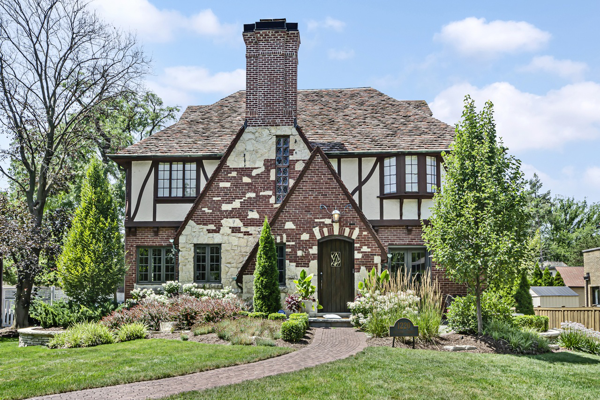

In [4]:
# single image of a house
img = PILImage(PILImage.create(fnames[0]).resize((600,400)))
img

In [5]:
# tensor.. ?
timg = TensorImage(array(img)).permute(2,0,1).float()/255.

In [6]:
# setup augmentation transforms of image
tfms = aug_transforms(pad_mode='zeros', mult=2, min_scale=0.75, do_flip=True, flip_vert=False, max_rotate=3, max_zoom=1.1,
                     max_lighting=0.2, max_warp=0.1, p_affine=0.75, p_lighting=0.5)

# NB: I took these parameters from an existing project on github-
# https://github.com/dumitrux/architectural-style-recognition/blob/master/src/architectural-style-recognition.ipynb
# tfms = get_transforms(do_flip=True, flip_vert=False, max_rotate=10, max_zoom=1.1, 
#                       max_lighting=0.2, max_warp=0.2, p_affine=0.75, p_lighting=0.75)
# NB: this get_transforms function is for the old fastai/pytorch versions so now I needed to use aug_transforms, as above


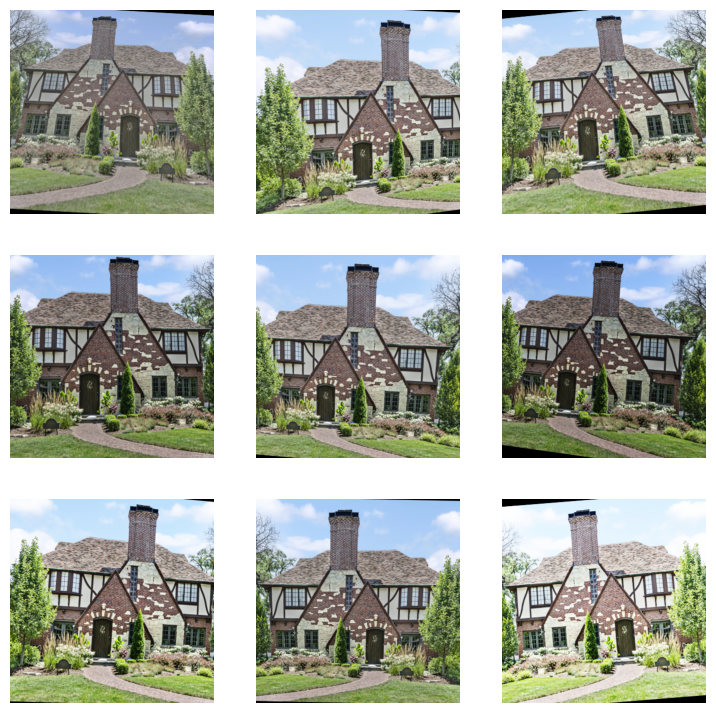

In [7]:
# TODO figure out what this function is doing!
def _batch_ex(bs):
    return TensorImage(timg[None].expand(bs, *timg.shape).clone())

# plot some sample transformations
y = _batch_ex(9)
for t in tfms: y = t(y, split_idx=0)
_,axs = plt.subplots(3,3, figsize=(9,9))
for i,ax in enumerate(axs.flatten()): show_image(y[i], ctx=ax)

In [10]:
# this way was using cap letter as labeler
# dls = ImageDataLoaders.from_name_func(path, files, label_func, bs=5, item_tfms=Resize(224), valid_pct=0.2)
# valid_pct is the percent of images used for validation

# this pulls the label from the file name (stuff before _ or -)
# dls = ImageDataLoaders.from_name_re(path, files, pat='^(.*)[_-].*?.jpg', item_tfms=Resize(224), bs=5)

# trying datablock instead
# here the subfolder name is used as the label
dblock = DataBlock(blocks = (ImageBlock, CategoryBlock),
                   get_items = get_image_files,
                   get_y = parent_label,
                   splitter = RandomSplitter(valid_pct=0.2, seed=44),
                   item_tfms = Resize(224),
                   batch_tfms = tfms)

# does this help anything?
# batch_tfms = aug_transforms(size=224)
# load the data (batch size 5 minimum)
dls = dblock.dataloaders(path, bs=12)

env: PYTORCH_ENABLE_MPS_FALLBACK=1
Could not do one pass in your dataloader, there is something wrong in it. Please see the stack trace below:


NotImplementedError: The operator 'aten::_linalg_solve_ex.result' is not currently implemented for the MPS device. If you want this op to be added in priority during the prototype phase of this feature, please comment on https://github.com/pytorch/pytorch/issues/77764. As a temporary fix, you can set the environment variable `PYTORCH_ENABLE_MPS_FALLBACK=1` to use the CPU as a fallback for this op. WARNING: this will be slower than running natively on MPS.

In [138]:
'train:', len(dls.train.items), 'valid:', len(dls.valid.items)

('train:', 52, 'valid:', 13)

In [139]:
print("Training images:\n", [x.stem for x in dls.train.items], "\n")
print("Validation images:\n", [x.stem for x in dls.valid.items])

Training images:
 ['red-victorian-home-wrap-around-porch-964fcce8-6d2ab8ee6f5b4d79941bd8866d1fb9ec', 'detroitbungalow_edited', 'prairie_410NElmwoodAve', '5E39127F-AA2D-456F-BB60-D3AC619AE854', 'StuccoFourSquare', 'bungalow-484149133', '001-1024x680', 'GettyImages-160808926-8259f31f8e924329bf7bc59c0f6e89dc', 'XL_21561_Jones_Listing_201_Market_Street_Bvillle_013', 'Foursquare_1016ElginAve', 'prairie_1624W100thPl', 'main3', 'Foursquare-613SGrove', 'Foursquare_330SLombardAve', 'chicagobungalow4', 'mqa946mcv8m61', '674b8fda13b2840a27e796dc69f82254', '2449FourSquare', 'XL_16916_Front', 'prairie_1712W104thPl', 'GettyImages-165432736-scaled', 'victorian_654NCentralAve', 'main4_prairie-1024x768', '2928FourSquare', 'bungalow_1218Rossell', 'chicagobungalow8', 'Stock-Small-Bungalow-Home-Exterior-AdobeStock_361162520-copy', 'portland-foursquare-home', 'chicagobungalow3', 'stuccobungalow2', 'Foursquare_724SElmwoodAve', '6891-prairie-style-home-chicago', 'americanfoursquare', 'bungalow_932NOakParkAve

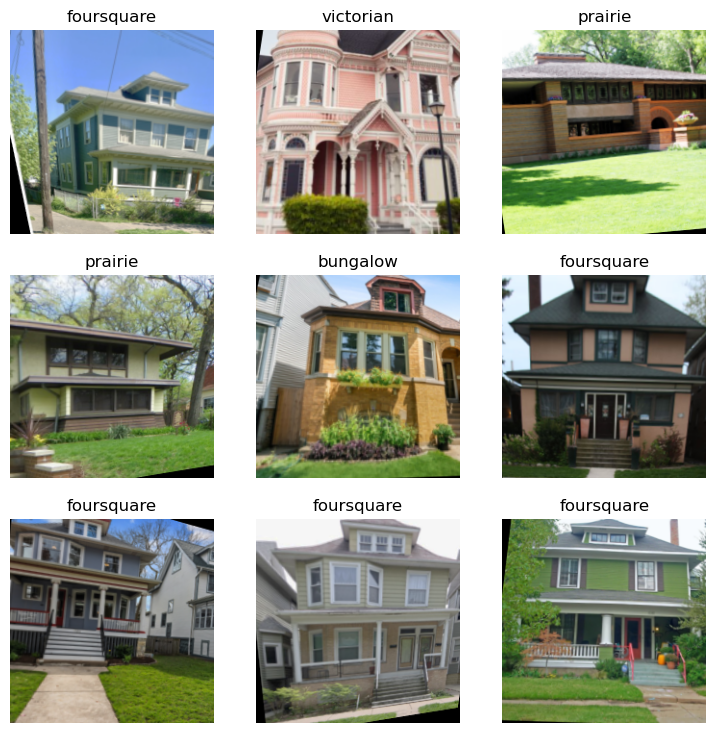

In [140]:
dls.show_batch()

In [141]:
# train the model
learn = vision_learner(dls, resnet34, metrics=error_rate)

# NB this was using ~6 cores on my local machine (macbook)

SuggestedLRs(valley=0.0030199517495930195)

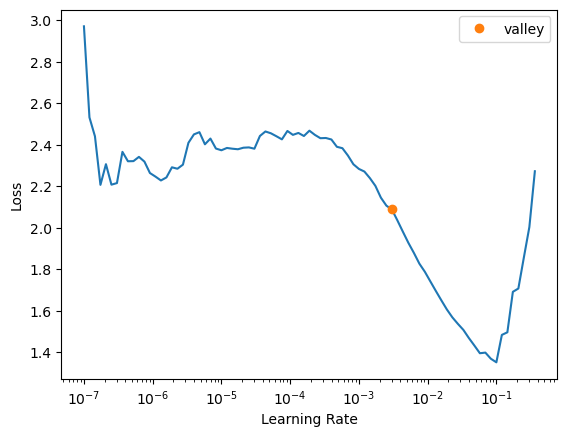

In [142]:
# ?? find optimal parameters for fine-tuning the model
learn.lr_find()

In [143]:
# fine tune the learner
learn.fine_tune(15, 0.003)

In [ ]:
# decent performance (~85% accuracy) with only this very limited image set

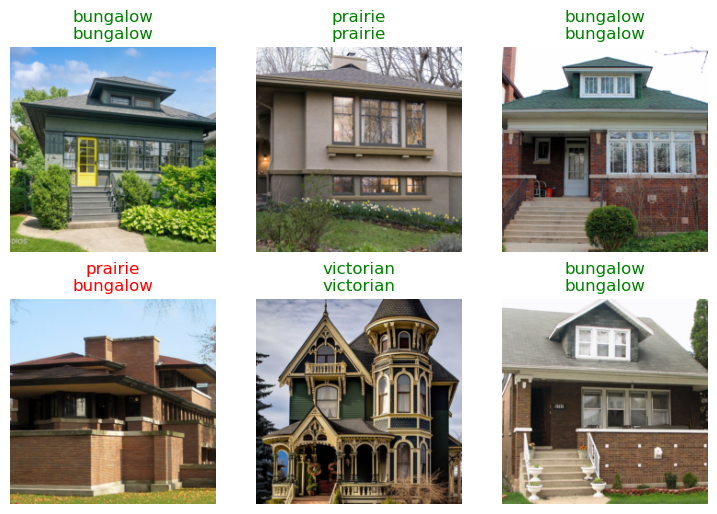

In [144]:
learn.show_results(max_n=6)

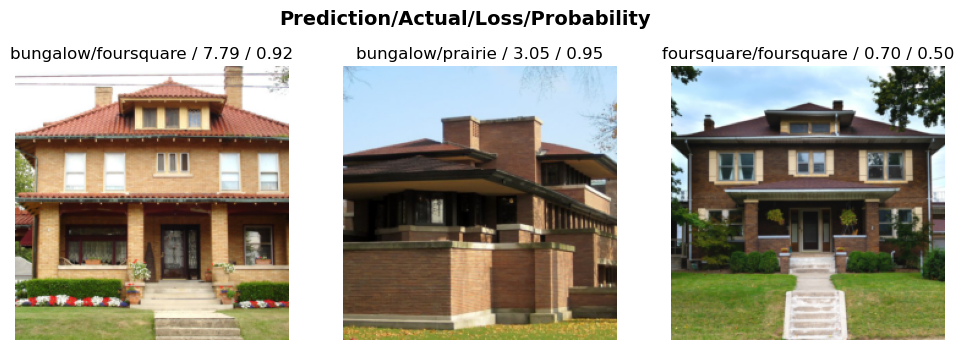

In [145]:
# find the images that give the most problems
interp = Interpretation.from_learner(learn)
interp.plot_top_losses(3, figsize=(12,4))

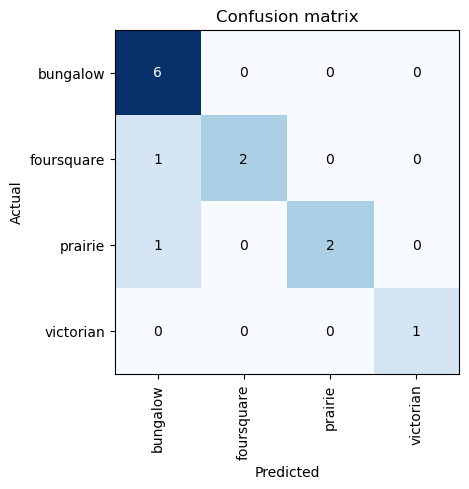

In [146]:
# look at confusion matrix
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

From this, we can see that bungalows, foursquares, and prairie-style homes all kind of blend together.

## Use the model to predict redfin images

## Create map of architectural diversity by block